## 1) Home task : KNN classification
- load `iris` dataset
- split to train and test
- train KNN classifiers for different `K`
- choose the best `K` determined on test set

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The best k = 5 , score = 0.9777777777777777


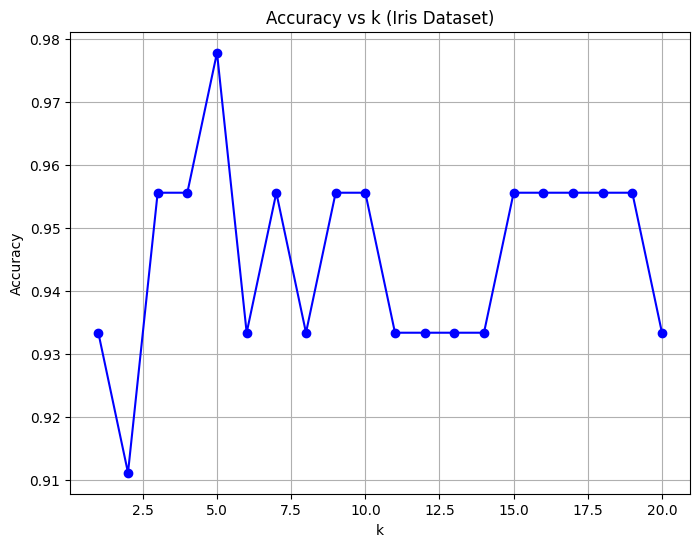

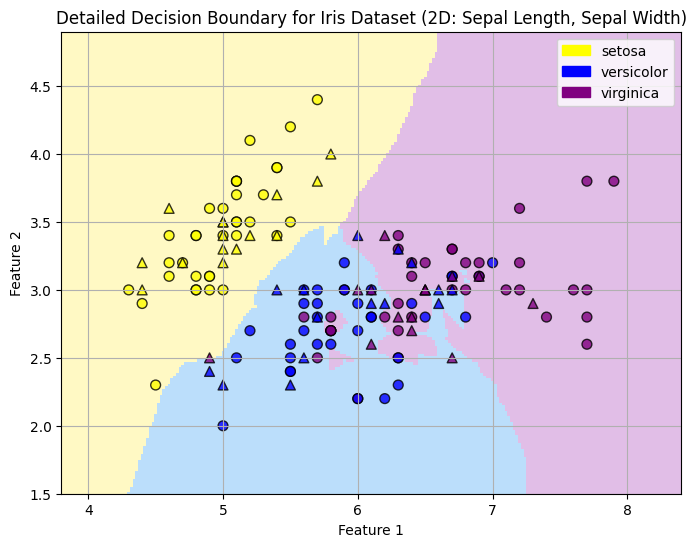

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed(2021) 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
print('data contains:', iris.keys())
X, y = iris.data, iris.target
labels = iris.target_names
feature_names = iris['feature_names']

# Create DataFrame
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
display(df_iris)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN classifiers for k = 1 to 20
scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Find best k
k_best = k_values[np.argmax(scores)]
score_best = max(scores)
print('The best k = {} , score = {}'.format(k_best, score_best))

# Visualization: Accuracy vs k (Iris)
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs k (Iris Dataset)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 2D visualization using sepal length and sepal width
X2 = X[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.3, random_state=42, stratify=y
)

knn_2D = KNeighborsClassifier(n_neighbors=k_best)
knn_2D.fit(X2_train, y2_train)

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def plot_decision_boundary_iris(clf, X_train, y_train, X_test, y_test,
                                title="Detailed Decision Boundary for Iris Dataset",
                                precision=0.05, plot_symbol_size=50):

    colors_for_areas = ["#FFF9C4", "#BBDEFB", "#E1BEE7"]
    colors_for_points = ["yellow", "blue", "purple"]

    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold = ListedColormap(colors_for_points)

    X_all = np.vstack((X_train, X_test))
    x_min, x_max = X_all[:, 0].min() - 0.5, X_all[:, 0].max() + 0.5
    y_min, y_max = X_all[:, 1].min() - 0.5, X_all[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, precision),
                         np.arange(y_min, y_max, precision))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    plt.scatter(X_train[:, 0], X_train[:, 1],
                c=y_train, cmap=cmap_bold,
                edgecolor='k', s=plot_symbol_size, alpha=0.8, label="Train")
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c=y_test, cmap=cmap_bold,
                edgecolor='k', marker='^', s=plot_symbol_size, alpha=0.8, label="Test")

    patch_setosa = mpatches.Patch(color=colors_for_points[0], label='setosa')
    patch_versicolor = mpatches.Patch(color=colors_for_points[1], label='versicolor')
    patch_virginica = mpatches.Patch(color=colors_for_points[2], label='virginica')
    plt.legend(handles=[patch_setosa, patch_versicolor, patch_virginica], loc="upper right")

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.grid(True)
    plt.show()

plot_decision_boundary_iris(
    knn_2D,
    X2_train, y2_train,
    X2_test, y2_test,
    title="Detailed Decision Boundary for Iris Dataset (2D: Sepal Length, Sepal Width)",
    precision=0.02
)


## 2) Synthetic dataset
- generrate synthetic dataset
- split to train and test
- train KNN regressors for different `K`
- choose the best `K` determined on test set
- visualize the decision boundary 


X_train.shape = 225, y_train.shape = 225
X_test.shape = 75, y_test.shape = 75
First 5 scaled X_train rows:
 [[ 0.7310468   1.88759955]
 [-0.09315299 -0.68498838]
 [ 0.66404826  0.43739056]
 [-1.78538719  0.5656113 ]
 [ 0.67592953  0.4526533 ]]


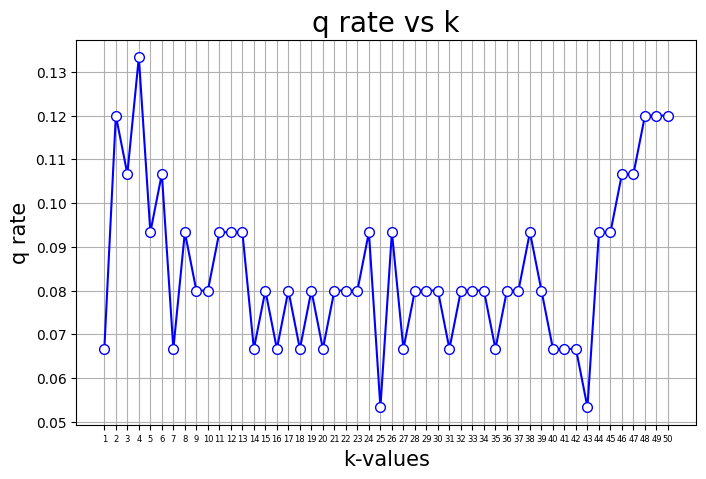

The best k = 25 , score = 0.9466666666666667


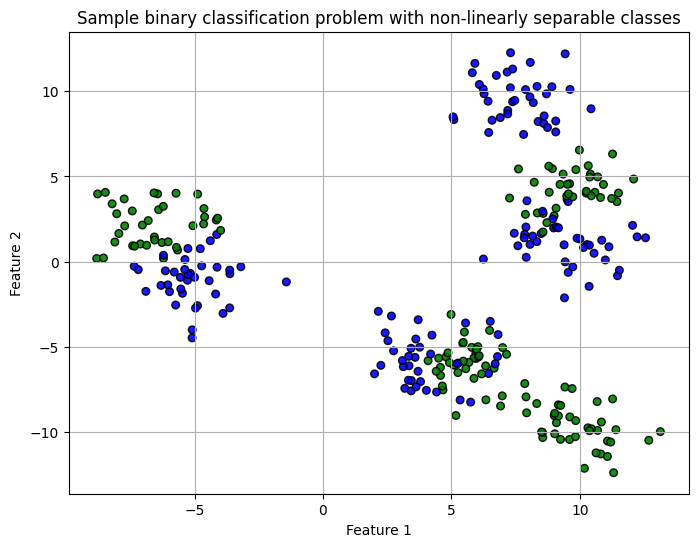

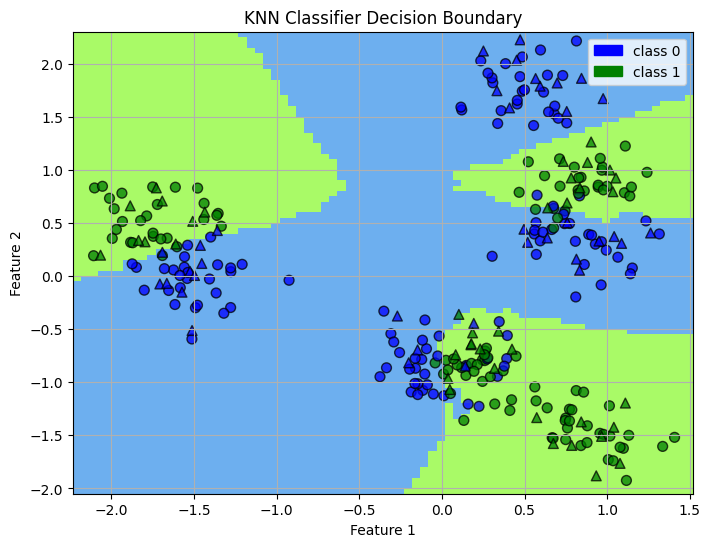

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
np.random.seed(2021)

# Generate synthetic binary classification dataset
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8,
                        cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_D2, y_D2, test_size=0.25, random_state=0, shuffle=True
)
print(f'X_train.shape = {X_train.shape[0]}, y_train.shape = {y_train.shape[0]}')
print(f'X_test.shape = {X_test.shape[0]}, y_test.shape = {y_test.shape[0]}')

# Feature scaling (Standardization)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("First 5 scaled X_train rows:\n", X_train[:5])

# Train KNN classifiers for different K values and compute error rate (1 - accuracy)
q_rate = []
k_range = range(1, 51)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    q_rate.append(np.mean(y_pred != y_test))

# Plot q_rate (error rate) vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, q_rate, marker="o", markerfacecolor="w", color="blue", markersize=7)
plt.title("q rate vs k", fontsize=20)
plt.xlabel("k-values", fontsize=15)
plt.ylabel("q rate", fontsize=15)
plt.xticks(k_range, fontsize=6)
plt.grid(True)
plt.show()

# Choose the best K and compute accuracy
k_best = np.argmin(q_rate) + 1
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train, y_train)
score_best = knn_best.score(X_test, y_test)
print(f'The best k = {k_best} , score = {score_best}')

# Visualize the decision boundary

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap_bold = ListedColormap(['blue', 'green'])

plt.figure(figsize=(8, 6))
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=cmap_bold,
            marker='o', s=30, edgecolor='k', alpha=0.9)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test=None,
                           title=None, precision=0.05, plot_symbol_size=50):
    colors_for_areas = ['#6DAFEF', '#A9FA67']
    colors_for_points = ['blue','green']
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold = ListedColormap(colors_for_points)

    X_all = np.concatenate([X_train, X_test], axis=0)
    x_min, x_max = X_all[:, 0].min() - 0.1, X_all[:, 0].max() + 0.1
    y_min, y_max = X_all[:, 1].min() - 0.1, X_all[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, precision),
                         np.arange(y_min, y_max, precision))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=plot_symbol_size, alpha=0.75, label="Train")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
                edgecolor='k', marker='^', s=plot_symbol_size, alpha=0.75, label="Test")

    patch0 = mpatches.Patch(color=colors_for_points[0], label='class 0')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='class 1')
    plt.legend(handles=[patch0, patch1])
    plt.title(title or f"Decision Boundary (k = {k_best})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(knn_best, X_train, y_train, X_test, y_test,
                       title="KNN Classifier Decision Boundary")